In [166]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
import cv2
import imutils
import random
import re
%matplotlib inline

In [172]:
def readWordList():
    word_list = []
    f = open('high_frequency_english_words.txt',rb)
    word_list = f.readlines()
    f.close()
    
    for i,line in enumerate(word_list):
        lines[i] = re.sub(r'[^a-zA-Z0-9]','',line)
        lines[i] = line[i].lower()
    
    return word_list
    

def changeCase(word):
    case = random.randint(0,2)
    if case == 0:
        # get lowercase word
        return word.lower()
    elif case == 1:
        # get camelcase word
        return word[0].upper()+word[1:]
    else:
        # get uppercase word
        return word.upper()

def getImageFromWord(word):
    
    word = changeCase(word)
    
    height, width = 512, 512
    img = np.zeros((height,width,3), np.uint8)
    img[:,:,:] = 255
    
    font                   = random.choice([0,1,2,3,4]) | 16 if random.randint(0,1) else 0
    bottomLeftCornerOfText = (30,150)
    fontScale              = 4
    fontColor              = (0,0,0)
    lineType               = random.randint(2,4)
    
    while True:
        textsize = cv2.getTextSize(word, font, fontScale, lineType)[0]
        if textsize[0] < width - 40:
            break
        else:
            fontScale -= 1
            
    print textsize
    
    # get coords based on boundary
    textX = (img.shape[1] - textsize[0]) / 2
    textY = (img.shape[0] + textsize[1]) / 2

    # add text centered on image
    cv2.putText(img, word, (textX, textY ), font, fontScale, fontColor, lineType)
    
    rotateFlag = random.randint(0,1)
    if rotateFlag:
        rotateAngle = random.randint(-10,10)
        M = cv2.getRotationMatrix2D((width/2,height/2),rotateAngle,1)
        img = cv2.warpAffine(img,M,(width,height),borderValue=(255,255,255))
    
    affineFlag = random.randint(0,1)
    if affineFlag:
        pts1 = np.float32([[10,10],[200,50],[50,200]])
        pts2 = np.float32([[10+random.randint(-20,20),30+random.randint(-20,20)]
                           ,[200,50],
                           [50+random.randint(-20,20),200+random.randint(-20,20)]])

        M = cv2.getAffineTransform(pts1,pts2)
        img = cv2.warpAffine(img,M,(width,height),borderValue=(255,255,255))

    plt.imshow(img)
    #print img.shape
    #return img

(451, 38)


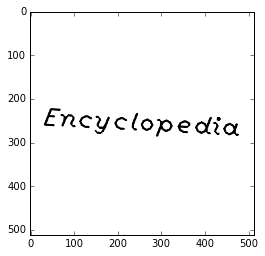